In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [68]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [69]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [70]:
df.describe()


,id,age
count,5480.000000,5243.000000
mean,3046.091971,37.119588
std,1717.121067,13.126959
min,3.000000,6.000000
25%,1563.750000,27.000000
50%,3046.000000,35.000000
75%,4545.250000,46.000000
max,6001.000000,91.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 14 columns):
id                         5480 non-null int64
name                       5480 non-null object
date                       5480 non-null object
manner_of_death            5480 non-null object
armed                      5268 non-null object
age                        5243 non-null float64
gender                     5479 non-null object
race                       4934 non-null object
city                       5480 non-null object
state                      5480 non-null object
signs_of_mental_illness    5480 non-null bool
threat_level               5480 non-null object
flee                       5224 non-null object
body_camera                5480 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 524.5+ KB


In [72]:
df = df.dropna(subset=['armed','age','gender','race','flee'])
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 5479
Data columns (total 14 columns):
id                         4449 non-null int64
name                       4449 non-null object
date                       4449 non-null object
manner_of_death            4449 non-null object
armed                      4449 non-null object
age                        4449 non-null float64
gender                     4449 non-null object
race                       4449 non-null object
city                       4449 non-null object
state                      4449 non-null object
signs_of_mental_illness    4449 non-null bool
threat_level               4449 non-null object
flee                       4449 non-null object
body_camera                4449 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 460.5+ KB


# Question 1

Any seasonality?  Do shootings increase/decrease at certain times of year?
On weekends/holidays?

In [74]:
import calendar

df['date'] = df['date'].astype('datetime64[ns]')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df_month=df.groupby(['month']).size().reset_index(name='count')
df_month=df_month.sort_values('month')
df_month['month'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
df_month.head()


,month,count
0,Jan,469
1,Feb,420
2,Mar,449
3,Apr,383
4,May,378


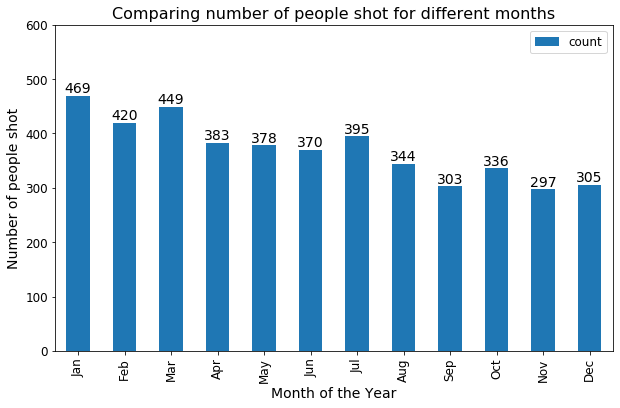

In [75]:
ax = df_month.plot(kind='bar',x='month',y='count',figsize=(10,6))
data_dict = df_month.values.tolist() 

values=[]
for i in data_dict:
        values.append(i[1])
        
rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height+0.01),
        xytext=(0, 0.08),  # 3 points vertical offset
        textcoords="offset points",
        fontsize=14,
        ha='center', va='bottom')
autolabel(rects)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0,600)
plt.xlabel('Month of the Year',fontsize=14)
plt.ylabel('Number of people shot',fontsize=14)
plt.title('Comparing number of people shot for different months',fontsize=16)
None

In [76]:
df['day of week'] = df['date'].dt.dayofweek
df_day=df.groupby(['day of week']).size().reset_index(name='count')
df_day=df_day.sort_values('day of week')
df_day['day of week'] = df_day['day of week'].apply(lambda x: calendar.day_abbr[x])
df_day.head()


,day of week,count
0,Mon,615
1,Tue,665
2,Wed,677
3,Thu,670
4,Fri,604


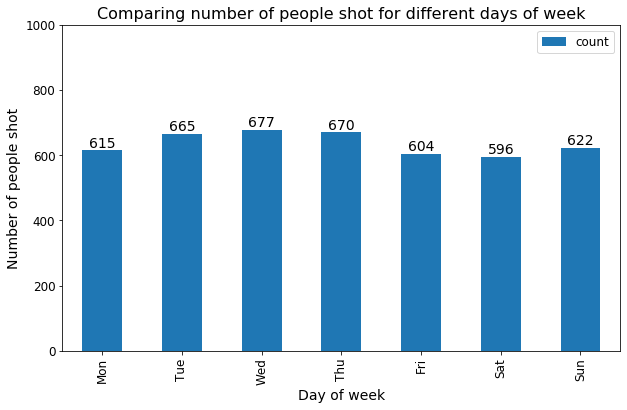

In [77]:
ax = df_day.plot(kind='bar',x='day of week',y='count',figsize=(10,6))
data_dict = df_day.values.tolist() 
values=[]
for i in data_dict:
        values.append(i[1])
        
rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height+0.01),
        xytext=(0, 0.08),  # 3 points vertical offset
        textcoords="offset points",
        fontsize=14,
        ha='center', va='bottom')
autolabel(rects)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0,1000)
plt.xlabel('Day of week',fontsize=14)
plt.ylabel('Number of people shot',fontsize=14)
plt.title('Comparing number of people shot for different days of week',fontsize=16)
None

# Question 2

Is there any relation between poverty rates in states and their fatal shooting rate?

In [109]:
df_citystate = df[['city','state']]
df_citystate.drop_duplicates().head()
df_citystate.head()

,city,state
0,Shelton,WA
1,Aloha,OR
2,Wichita,KS
3,San Francisco,CA
4,Evans,CO


In [110]:
df_poverty = pd.read_csv('poverty_rate.csv').rename(columns={'Total':'poverty rate'})
df_poverty.head()
df_poverty.shape

(51, 2)

In [111]:
df_state = df.groupby(['state']).size().reset_index(name='shooting rate')
df_state.head()
df_state.shape

(51, 2)

In [112]:
# Create x, where x the 'scores' column
scaler = MinMaxScaler()
df_state[['shooting rate']] = scaler.fit_transform(df_state[['shooting rate']])
df_state.head()

,state,shooting rate
0,AK,0.049285
1,AL,0.133545
2,AR,0.096979
3,AZ,0.316375
4,CA,1.000000


In [113]:
df_poverty[['poverty rate']] = scaler.fit_transform(df_poverty[['poverty rate']])
df_state.head()

,state,shooting rate
0,AK,0.049285
1,AL,0.133545
2,AR,0.096979
3,AZ,0.316375
4,CA,1.000000


In [114]:
df_state = df_state.join(df_poverty['poverty rate'])
df_state.head()

,state,shooting rate,poverty rate
0,AK,0.049285,0.769231
1,AL,0.133545,0.307692
2,AR,0.096979,0.538462
3,AZ,0.316375,0.769231
4,CA,1.000000,0.461538


In [115]:
df_state[['shooting rate','poverty rate']].corr()

,shooting rate,poverty rate
shooting rate,1.000000,0.173367
poverty rate,0.173367,1.000000


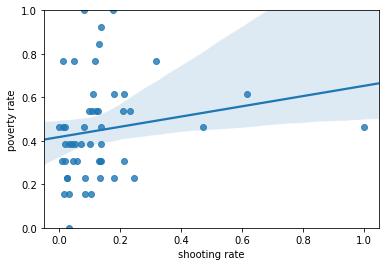

In [119]:
sns.regplot(x="shooting rate", y="poverty rate", data=df_state)
plt.ylim(0,1)
None